# DETECTING COVID-19 USING X-RAY IMAGES

In this project we are trying to detect covid-19 using x-ray images.Here we took 2 data source 1.github(for covid-19 x-ray images ) and 2.kaggle(for normal x-ray images ) 

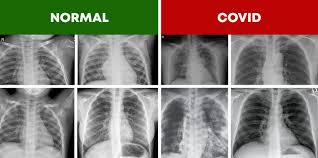

# Dataset Creation

In [1]:
import pandas as pd
import os
import shutil


In [2]:
#Create the data from positive samples(github)
file_path = "metadata.csv"
images_path = "images"

In [3]:
df = pd.read_csv(file_path)    # import the data

In [4]:
df.shape

(950, 30)

In [5]:
df.sample(6)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
690,363,NaN,F,55.0,Pneumonia/Bacterial/Legionella,NaN,NaN,NaN,NaN,NaN,...,NaN,"Melbourne, Australia",images,f6ece95b172eadba762bf3daef7441_jumbo-1.jpeg,NaN,https://radiopaedia.org/cases/legionella-pneum...,CC BY-NC-SA,"Presentation: Fevers, cough. . Imaging Notes: ...","Case courtesy of Dr Henry Knipe, Radiopaedia.o...",NaN
79,35,NaN,M,43.0,Pneumonia/Viral/COVID-19,Y,NaN,NaN,NaN,NaN,...,"Mar 4, 2020",Italy,images,925446AE-B3C7-4C93-941B-AC4D2FE1F455.jpeg,NaN,https://www.sirm.org/2020/03/04/covid-19-caso-7/,NaN,"Extended ground glass alteration in the LIS, w...",Credit to Radiology ASST Cremona,NaN
26,13,9.0,M,35.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 24, 2020","Snohomish County, Washington, United States",images,nejmoa2001191_f4.jpeg,10.1056/NEJMoa2001191,https://www.nejm.org/doi/full/10.1056/NEJMoa20...,NaN,"On January 19, 2020, a 35-year-old man present...",NaN,NaN
522,282,0.0,M,46.0,Pneumonia/Bacterial/Mycoplasma,NaN,Y,N,N,NaN,...,2015,"Milan, Italy",images,000001.jpg,NaN,https://www.eurorad.org/case/12325,CC BY-NC-SA 4.0,A middle-aged male with newly diagnosed Human ...,"Credit to Tonolini Massimo, MD.",NaN
804,420,60.0,M,45.0,Pneumonia/Bacterial/Nocardia,NaN,NaN,NaN,NaN,NaN,...,NaN,"Milan, Italy",images,000008.jpg,NaN,https://www.eurorad.org/case/10027,CC BY-NC-SA 4.0,"A middle-aged, 45-year-old male patient with l...",NaN,NaN
381,209,NaN,F,59.0,Pneumonia/Viral/COVID-19,Unclear,NaN,NaN,NaN,NaN,...,NaN,"Centro Hospitalar Universitário do Porto, Port...",images,16689_2_4.png,NaN,https://www.eurorad.org/case/16689,CC BY-NC-SA 4.0,"An 83-year-old female patient, presented with ...",NaN,NaN


In [6]:
df.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

In [7]:
df.finding.value_counts()

Pneumonia/Viral/COVID-19                   584
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
No Finding                                  22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Viral/Herpes                       3
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fun

In [8]:
target_dir = "Dataset/covid"   

if not os.path.exists(target_dir):
    os.mkdir(target_dir)                     ##creating new folder
    print("covid floder is created")

In [9]:
cnt = 0

for (i,row) in df.iterrows():                                             ##iterating over all the rows
    if row["finding"]=="Pneumonia/Viral/COVID-19" and row["view"]=="PA":  #check for conditons
        filename = row["filename"]                                        #store in the given name 
        image_path = os.path.join(images_path,filename)
        image_copy_path = os.path.join(target_dir,filename)
        shutil.copy2(image_path,image_copy_path)                          #fltered mages copied from orignal dir to new file
       # print("Moving image",cnt)
        cnt+=1
    
print(cnt)

196


In [10]:
# sampling of images from kaggle
import random
kaggle_file_path = "chest_xray_kaggle/train/NORMAL"
target_normal_dir = "Dataset/Normal"

In [11]:
image_names = os.listdir(kaggle_file_path)

In [12]:
random.shuffle(image_names)                     

In [13]:
for i in range(196):                            #selecting random 196 mages
    image_name = image_names[i]
    image_path = os.path.join(kaggle_file_path,image_name)
    
    target_path = os.path.join(target_normal_dir,image_name)
    
    shutil.copy2(image_path,target_path)
    print("copying image",i)

copying image 0
copying image 1
copying image 2
copying image 3
copying image 4
copying image 5
copying image 6
copying image 7
copying image 8
copying image 9
copying image 10
copying image 11
copying image 12
copying image 13
copying image 14
copying image 15
copying image 16
copying image 17
copying image 18
copying image 19
copying image 20
copying image 21
copying image 22
copying image 23
copying image 24
copying image 25
copying image 26
copying image 27
copying image 28
copying image 29
copying image 30
copying image 31
copying image 32
copying image 33
copying image 34
copying image 35
copying image 36
copying image 37
copying image 38
copying image 39
copying image 40
copying image 41
copying image 42
copying image 43
copying image 44
copying image 45
copying image 46
copying image 47
copying image 48
copying image 49
copying image 50
copying image 51
copying image 52
copying image 53
copying image 54
copying image 55
copying image 56
copying image 57
copying image 58
copying

# Model Building

In [18]:
! pip install keras

In [20]:
#importing packages
!pip install tensorflow

  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl (9.1 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1_mo

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras.models as km
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image


In [23]:
train_path = "CovidDataset/Train"
val_path = "CovidDataset/test"

### CNN based model in keras

In [24]:
model  = Sequential()                                                                  #defining the model
model.add(Conv2D(32,kernel_size= (3,3),activation = "relu",input_shape = (224,224,3))) #conv layer1
model.add(Conv2D(64,(3,3),activation = "relu"))                                        #conv layer2
model.add(MaxPooling2D(pool_size = (2,2)))                                             #Pooling layer 1
model.add(Dropout(0.25))                                                               #Dropout layer 1 

model.add(Conv2D(64,(3,3),activation = "relu"))                                        #conv layer 2
model.add(MaxPooling2D(pool_size = (2,2)))                                             #Pooling layer 2
model.add(Dropout(0.25))                                                               #Dropout layer 2

model.add(Conv2D(128,(3,3),activation = "relu"))                                       #conv layer 3    
model.add(MaxPooling2D(pool_size = (2,2)))                                             #Pooling layer 3    
model.add(Dropout(0.25))                                                               #Dropout layer 3

model.add(Flatten())                                                                   #flatten layer   
model.add(Dense(64,activation="relu"))                                                 #Dense layer 1
model.add(Dropout(0.5))                                                                #Dropout layer
model.add(Dense(1,activation="sigmoid"))                                               #Dense layer 2(output layer)

model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=["accuracy"])


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [26]:
#train data generation
train_datagen = image.ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = image.ImageDataGenerator(rescale=1/255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    "Coviddataset/Train",
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')



Found 224 images belonging to 2 classes.


In [28]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [29]:
#validation data generation
val_generator = test_datagen.flow_from_directory(
    "Coviddataset/val",
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [30]:
wsdxc bhist = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=val_generator,
        validation_steps=2
        )

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10876/2798517411.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 101s 12s/step - loss: 2.3250 - accuracy: 0.5312 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 68s 9s/step - loss: 0.6963 - accuracy: 0.4732 - val_loss: 0.6925 - val_accuracy: 0.7167
Epoch 3/10
7/7 [==============================] - 67s 9s/step - loss: 0.6776 - accuracy: 0.6205 - val_loss: 0.6670 - val_accuracy: 0.9000
Epoch 4/10
7/7 [==============================] - 70s 10s/step - loss: 0.5828 - accuracy: 0.7143 - val_loss: 0.4794 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 69s 10s/step - loss: 0.4800 - accuracy: 0.7902 - val_loss: 0.3501 - val_accuracy: 0.9333
Epoch 6/10
7/7 [==============================] - 68s 9s/step - loss: 0.3879 - accuracy: 0.8527 - val_loss: 0.2896 - val_accuracy: 0.8833
Epoch 7/10
7/7 [==============================] - 71s 10s/step - loss: 0.3765 - accuracy: 0.8616 - val_loss: 0.1905 - val_accuracy: 0.9667
Epoch 8/10
7/7 [=============

In [34]:
model.save("model_adv.h5")

In [35]:
model.evaluate(train_generator)

7/7 [==============================] - 23s 3s/step - loss: 0.1583 - accuracy: 0.9598


[0.15827004611492157, 0.9598214030265808]

In [36]:
model.evaluate(val_generator)

2/2 [==============================] - 6s 2s/step - loss: 0.1111 - accuracy: 0.9667


[0.11112582683563232, 0.9666666388511658]

### Test images

In [79]:
from keras import models

In [80]:
model = models.load_model("model_adv.h5")

In [81]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [82]:
y_actual = []
y_test = []

In [83]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size = (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p =  (model.predict(img) > 0.5).astype("int32")
    y_test.append(p[0])
    y_actual.append(1)

In [84]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size = (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p =  (model.predict(img) > 0.5).astype("int32")
    y_test.append(p[0])
    y_actual.append(0)

In [85]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
cm = confusion_matrix(y_actual,y_test)

In [88]:
import seaborn as sns

<AxesSubplot:>

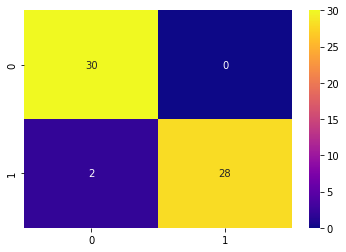

In [94]:
sns.heatmap(cm,cmap="plasma",annot=True)